In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Cargar datos y descripcion general

In [272]:
alzheimer_df = pd.read_csv('data/alzheimers_disease_data.csv')
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [273]:
# Tamaño de la tabla (df.shape[0] es el número de filas y df.shape[1] es el número de columnas)
print(f"Número de filas: {alzheimer_df.shape[0]}")
print(f"Número de columnas: {alzheimer_df.shape[1]}")

Número de filas: 2149
Número de columnas: 35


### 1.1 Descripcion general de los datos (alzheimer_df)

Cada fila representa un paciente y cada columna contiene las características de dichos pacientes.

| Columna | Descripción |
| --- | --- |
| PatientID | Un identificador único asignado a cada paciente (4751-6900). |
| Age | Edad del paciente (60-90 años). |
| Gender | Género del paciente (0 = Masculino, 1 = Femenino). |
| Ethnicity | Etnicidad del paciente (0 = Caucásico, 1 = Afroamericano, 2 = Asiatico, 3 = Otro). |
| EducationLevel | Nivel de educación del paciente (0 = Ninguno, 1 = High School, 2 = Bachelor's, 3 = Más alto). |
| BMI | Índice de masa corporal (15-40). |
| Smoking | Si el paciente fuma o no (0 = No, 1 = Sí). |
| AlcoholConsumption | Consumo semanal de alcohol en unidades (0-20). |
| PhysicalActivity | Actividad física semanal en horas (0-10 horas). |
| DietQuality | Calidad de la dieta del paciente (0-10). |
| SleepQuality | Calidad del sueño del paciente (4-10). |
| FamilyHistoryAlzheimers | Si el paciente tiene historia familiar sobre la enfermedad del Alzheimer (0 = No, 1 = Sí). |
| CardiovascularDisease | Si el paciente tiene enfermedad cardiovascular (0 = No, 1 = Sí). |
| Diabetes | Si el paciente tiene diabetes (0 = No, 1 = Sí). |
| Depression | Si el paciente tiene depresión (0 = No, 1 = Sí). |
| HeadInjury | Si el paciente tiene historia de traumas en la cabeza (0 = No, 1 = Sí). |
| Hypertension | Si el paciente tiene hipertensión (0 = No, 1 = Sí). |
| SystolicBP | Presion arterial sistolica (90-180 mmHg). |
| DiastolicBP | Presion arterial diastolica (60-120 mmHg). |
| CholesterolTotal | Niveles de colesterol total (150-300 mg/dL). |
| CholesterolLDL | Densidad de colesterol LDL (50-200 mg/dL). |
| CholesterolHDL | Densidad de colesterol HDL (20-100 mg/dL). |
| CholesterolTriglycerides | Niveles de trigliceridos (50-400 mg/dL). |
| MMSE | Puntaje del test MMSE (0-30). Puntajes bajos indican deterioro cognitivo. |
| FunctionalAssessment | Puntaje de evaluación funcional (0-10). Puntajes bajos indican deterioro cognitivo. |
| MemoryComplaints | Si el paciente tiene quejas de memoria (0 = No, 1 = Sí). |
| BehavioralProblems | Si el paciente tiene problemas de comportamiento (0 = No, 1 = Sí). |
| ADL | Puntaje de la evaluación ADL (0-10). Puntajes bajos indican deterioro cognitivo. |
| Confusion | Si el paciente tiene confusión (0 = No, 1 = Sí). |
| Disorientation | Si el paciente tiene desorientación (0 = No, 1 = Sí). |
| PersonalityChanges | Si el paciente tiene cambios en la personalidad (0 = No, 1 = Sí). |
| DifficultyCompletingTasks | Si el paciente tiene dificultad para completar tareas (0 = No, 1 = Sí). |
| Forgetfulness | Si el paciente tiene olvido (0 = No, 1 = Sí). |
| **Diagnosis** | Si el paciente tiene Alzheimer de acuerdo al diagnostico (0 = No, 1 = Sí). |
| DoctorInCharge | Informacion del doctor que atendió al paciente. Esto es informacion confidencial (XXXConfid). |

Nota adicional:
- MMSE: Test de evaluación cognitiva que mide la memoria, atención, concentración y habilidades ejecutivas.
- ADL: Evaluación de la capacidad de realizar actividades diarias independientemente.

### 1.2 Resumen de los datos

Se puede categorizar las caracteristicas (columnas) de los pacientes en:
- Detalles demográficos: edad, genero, etnicidad y nivel de educacion.
- Factores del estilo de vida: indice de masa corporal, si fuma o no, consumo de alcohol, actividad fisica, calidad de la dieta y calidad del sueño.
- Historial medico: historia familiar de alzheimer, enfermedad cardiovascular, diabetes, depresion, traumatismo en la cabeza e hipertension.
- Medidas clinicas: presion arterial sistolica, presion arterial diastolica, colesterol total, colesterol LDL, colesterol HDL y colesterol trigliceridos.
- Evaluaciones cognitivas y funcionales: evaluacion MMSE, evaluacion funcional, quejas de memoria, problemas de comportamiento y evaluacion ADL.
- Sintomas: confusion, desorientación, cambios en la personalidad, dificultad para completar tareas y problemas de olvido.
- Informacion diagnostica: diagnostico de alzheimer (Target).

# 2. Analisis exploratorio de los datos (EDA)

### 2.1 Tipos de variables y número de datos no nulos

In [274]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [275]:
# Detectar si el dataset contiene valores NaN
total_nan = alzheimer_df.isna().sum().sum()
print(f"Total de valores faltantes (NaN) en el dataset: {total_nan}")

if total_nan == 0:
    print("No hay necesidad de imputar datos.")
else:
    print("El dataset requiere imputacion de datos.")

Total de valores faltantes (NaN) en el dataset: 0
No hay necesidad de imputar datos.


Interpretacion: Se puede observar que no hay datos nulos en las columnas, por lo que no será necesario la imputar datos más adelante. Ademas, se puede observar que todas las columnas son numericas, excepto la columna DoctorInCharge, que es de tipo object. A grandes rasgos, debido a que la columna DoctorInCharge no es relevante para el modelo (al igual que la columna PatientID), tampoco sera necesaria la conversion de variables categoricas a numericas en el procesamiento de datos (Sección 3).

### 2.2 Estadisticas descriptivas de los datos

In [276]:
# Separar las columnas en dos grupos para que se pueda visualizar mejor los resultados/graficos
# No se tiene en cuenta las columnas DoctorInCharge y PatientID
first_half = ["Age", "Gender", "Ethnicity", "EducationLevel", "BMI", 
              "Smoking", "AlcoholConsumption", "PhysicalActivity", "DietQuality", 
              "SleepQuality", "FamilyHistoryAlzheimers", "CardiovascularDisease", 
              "Diabetes", "Depression", "HeadInjury", "Hypertension"]

second_half = ["SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", 
               "CholesterolHDL", "CholesterolTriglycerides", "MMSE", 
               "FunctionalAssessment", "MemoryComplaints", "BehavioralProblems", "ADL",
               "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
               "Forgetfulness", "Diagnosis"]

# Parte 1
alzheimer_df[first_half].describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [277]:
# Parte 2
alzheimer_df[second_half].describe()

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nota: Debido a que las variables numericas tienen diferentes escalas, será necesario estandarizar las variables en la implementacion del pipeline (Sección 3.3).

### 2.3 Histograma de las variables numericas (distribucion de variables)

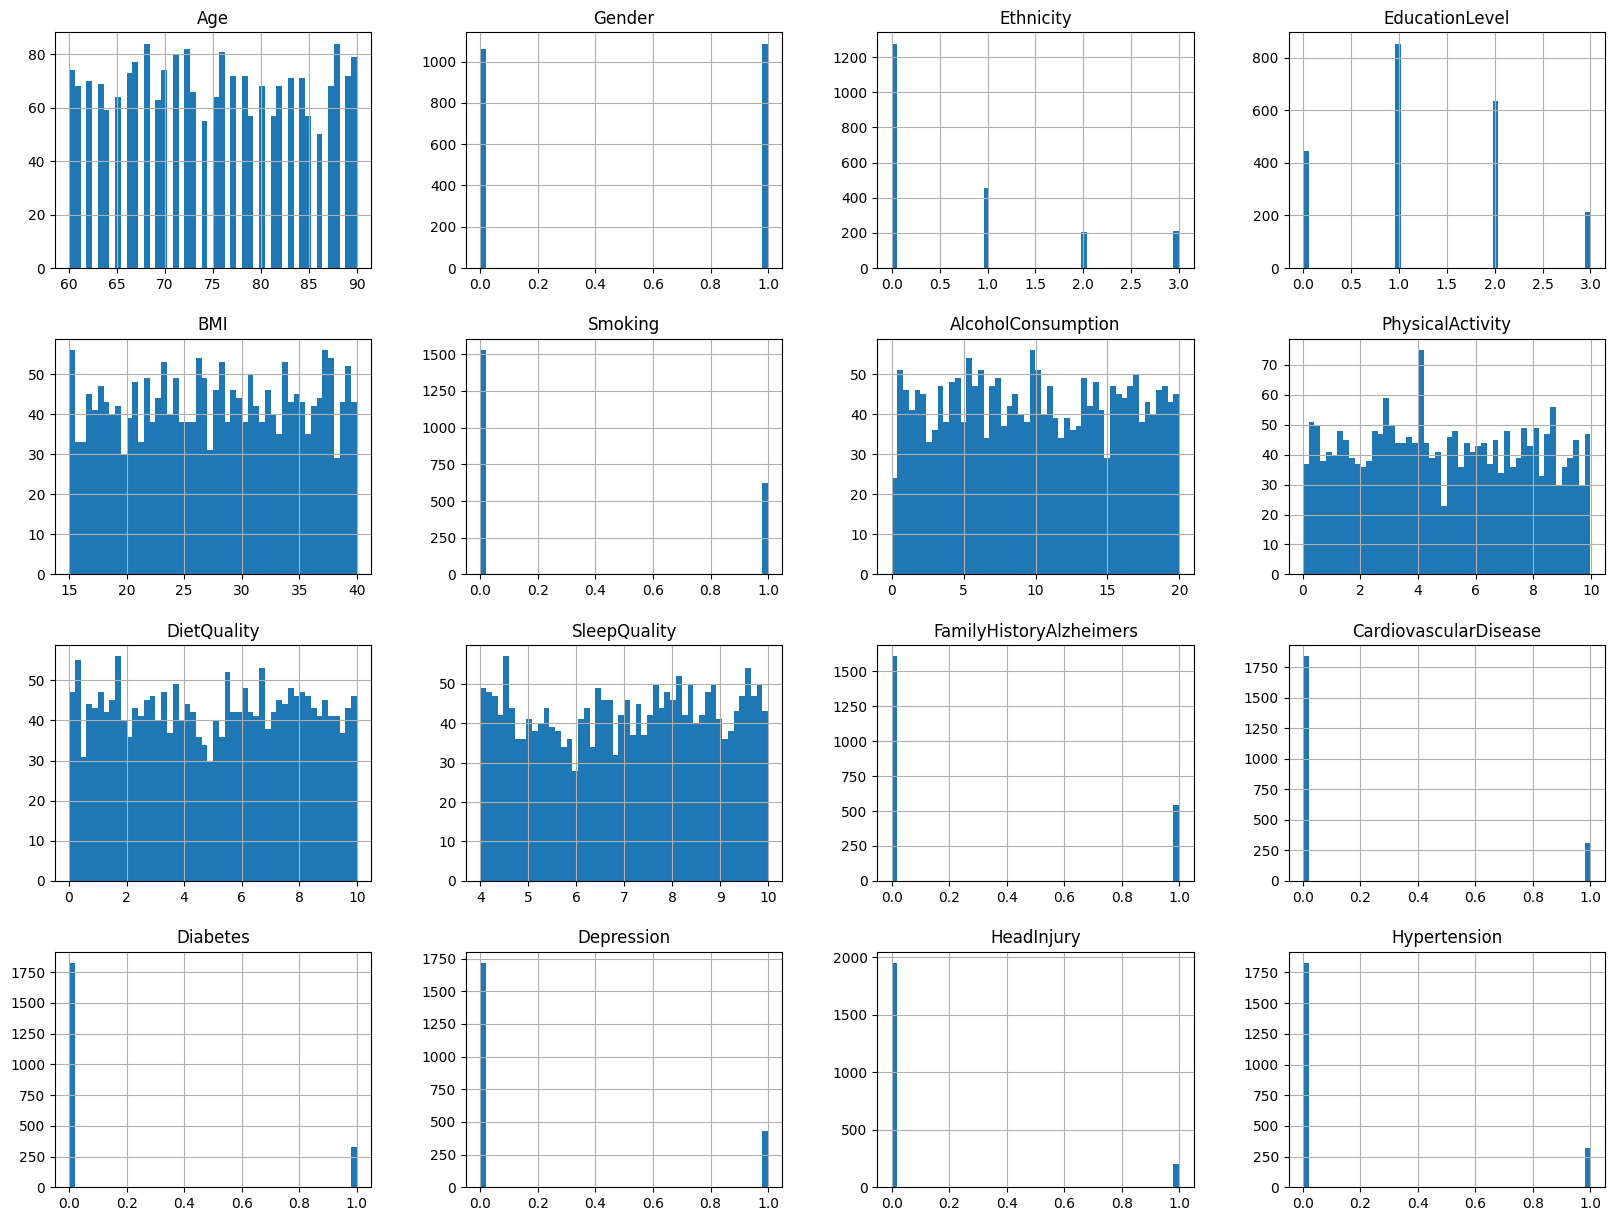

In [278]:
# Parte 1
alzheimer_df[first_half].hist(bins=50, figsize=(20, 15)); # El punto y coma es para que solo se imprima los graficos y no el codigo

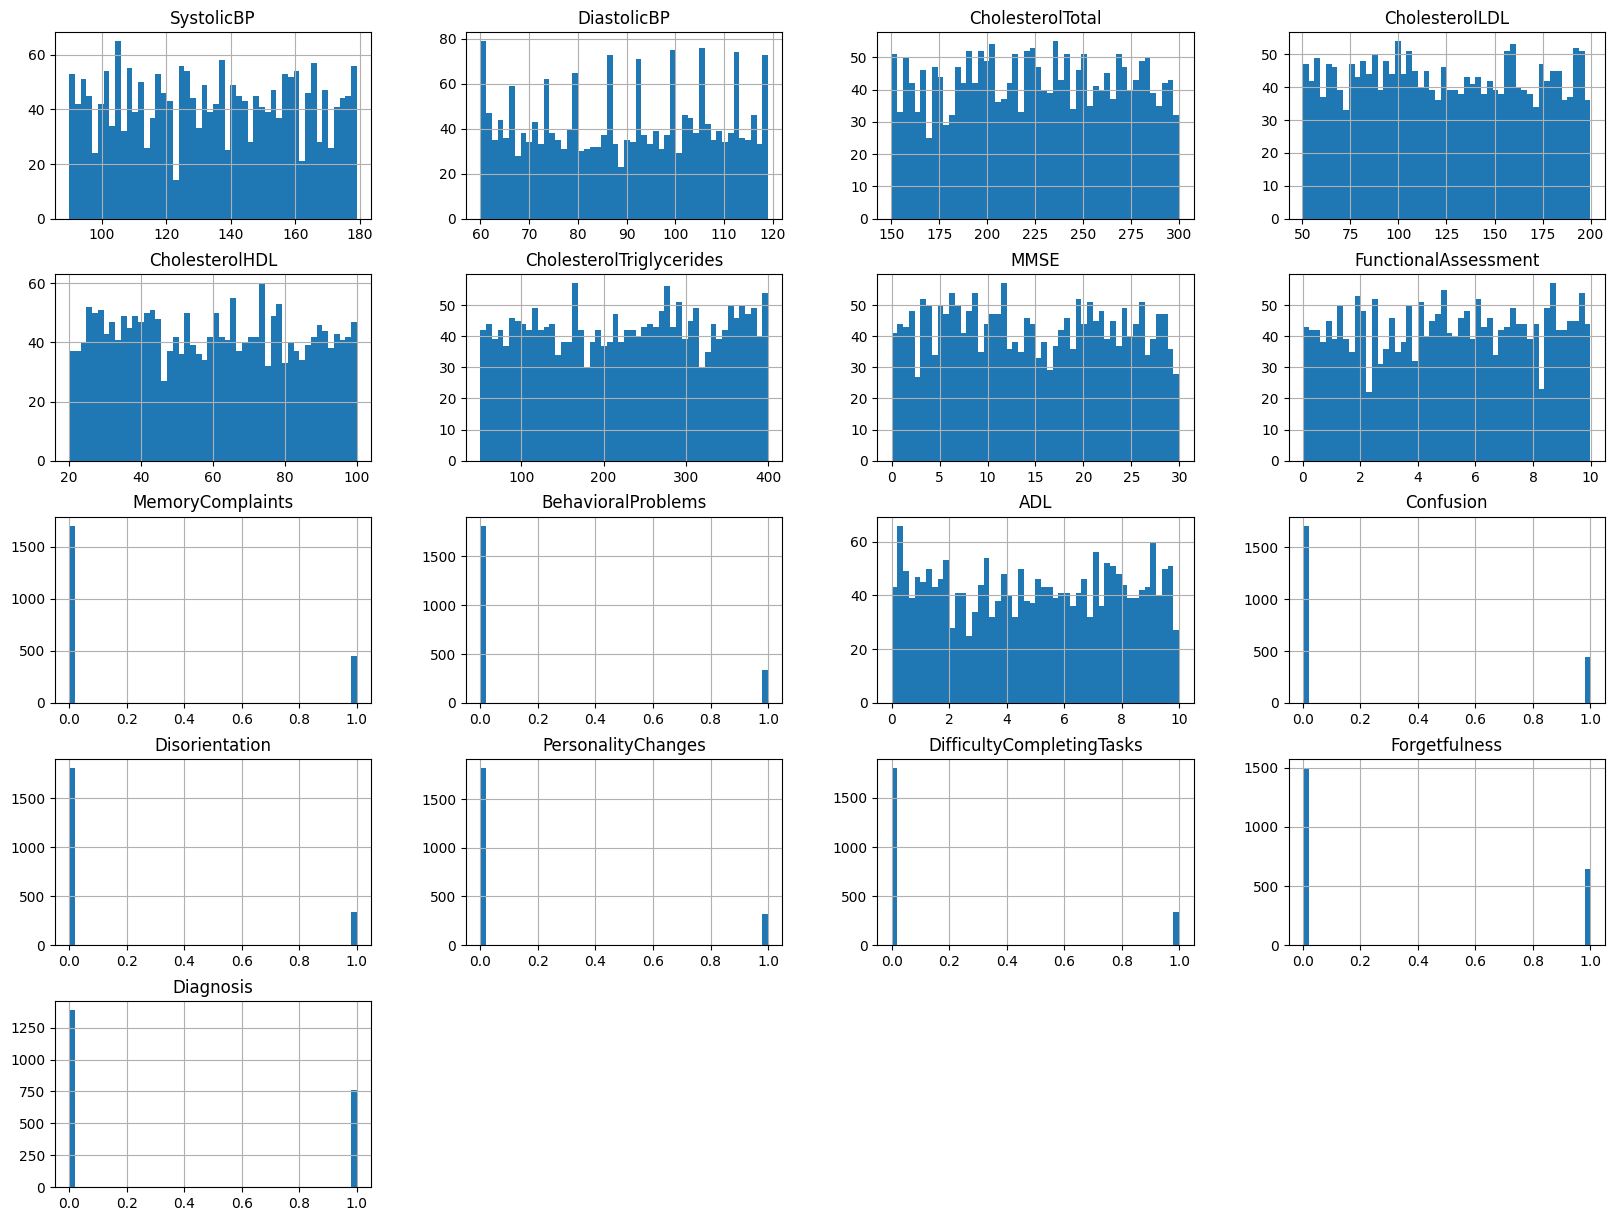

In [279]:
# Parte 2
alzheimer_df[second_half].hist(bins=50, figsize=(20, 15), layout=(5, 4));

Interpretacion/Resumen general de las Secciones 2.2 y 2.3: 

Variables numericas (discretas y continuas):
- La edad promedio de los pacientes es de 75 años.
- El indice de masa corporal promedio es de 27.66 (Sobrepeso).
- El promedio de consumo de alcohol es de 10 unidades, con un maximo de 20 unidades.
- El promedio de actividad fisica es de 5 horas, con un maximo de 10 horas.
- El promedio de calidad de la dieta es de 5, con un maximo de 10.
- El promedio de calidad del sueño es de 7, con un maximo de 10.
- El promedio de presion arterial sistolica es de 134.26 mmHg, con un maximo de 179 mmHg.
- El promedio de presion arterial diastolica es de 89.85 mmHg, con un maximo de 119 mmHg.
- El promedio de colesterol total es de 225.2 mg/dL, con un maximo de 300 mg/dL.
- El promedio de colesterol LDL es de 124.34 mg/dL, con un maximo de 200 mg/dL.
- El promedio de colesterol HDL es de 59.46 mg/dL, con un maximo de 100 mg/dL.
- El promedio de colesterol trigliceridos es de 228.28 mg/dL, con un maximo de 400 mg/dL.
- El promedio de MMSE es de 14.76, con un maximo de 30.
- El promedio de evaluacion funcional es de 5.08, con un maximo de 10.
- El promedio de evaluacion ADL es de 5, con un maximo de 10.

Variables categoricas (ordinales y nominales):
- Hay alrededor de un 50% de pacientes masculinos y un 50% femeninos.
- La mayoria de los pacientes son caucásicos, le siguen en frecuencia los afroamericanos, asiaticos y luego otros.
- El nivel de educacion mas frecuente es el High School, seguido de Bachelor's, "Ninguno" y finalmente "Mas alto" (ej. Doctorado).
- La gran mayoria de los pacientes no fuman.
- La gran mayoria de pacientes no tienen historia familiar de alzheimer.
- La gran mayoria de pacientes no tienen enfermedad cardiovascular.
- La gran mayoria de pacientes no tienen diabetes.
- La gran mayoria de pacientes no tienen depresion.
- La gran mayoria de pacientes no tienen historia de traumatismo en la cabeza.
- La gran mayoria de pacientes no tienen hipertension.
- La gran mayoria de pacientes no tienen quejas de memoria.
- La gran mayoria de pacientes no tienen problemas de comportamiento.
- La gran mayoria de pacientes no tienen confusion.
- La gran mayoria de pacientes no tienen desorientación.
- La gran mayoria de pacientes no tienen cambios en la personalidad.
- La gran mayoria de pacientes no tienen dificultad para completar tareas.
- La gran mayoria de pacientes no tienen olvido.
- La mayoria de pacientes no tienen diagnostico de alzheimer.

Nota: Vale aclarar que, la frase "gran mayoria" se refiere a cuando hay alrededor de un 70 a 100% de pacientes que presentan o no una caracteristica en especifico.

### 2.4 Correlaciones entre las variables

In [280]:
alzheimer_df_temp = alzheimer_df.drop(columns = ['PatientID', 'DoctorInCharge'])
corr_matrix = alzheimer_df_temp.corr()

# Calcular la correlacion maxima absoluta para cada variable
max_correlations = {}
for col in corr_matrix.columns:
    # Obtener todas las correlaciones para esta variable (excluyendo la correlacion consigo misma)
    var_correlations = corr_matrix[col].drop(col)
    
    # Encontrar la correlacion absoluta maxima
    max_corr_var = var_correlations.abs().idxmax()
    max_corr_value = var_correlations[max_corr_var]
    
    max_correlations[col] = (max_corr_var, max_corr_value)

# Eliminar correlaciones redundantes
relevant_correlations = {}
seen_pairs = []

for k, v in max_correlations.items():
    # Crear un identificador consistente para las correlaciones
    pair_id = tuple(sorted([k, v[0]]))
    
    if pair_id not in seen_pairs:
        seen_pairs.append(pair_id)
        relevant_correlations[k] = v

# Ordenar por valor absoluto
sorted_correlations = sorted(relevant_correlations.items(), key=lambda x: abs(x[1][1]), reverse=True)

print("Top 10 correlaciones entre variables:")
n = 0
for var, (corr_var, corr_value) in sorted_correlations[:10]:
    n += 1
    print(f"{n}. {var} - {corr_var}: {round(corr_value, 2)}")

Top 10 correlaciones entre variables:
1. FunctionalAssessment - Diagnosis: -0.36
2. ADL - Diagnosis: -0.33
3. MemoryComplaints - Diagnosis: 0.31
4. MMSE - Diagnosis: -0.24
5. BehavioralProblems - Diagnosis: 0.22
6. BMI - Forgetfulness: 0.07
7. Age - EducationLevel: -0.06
8. CholesterolHDL - DifficultyCompletingTasks: -0.06
9. SleepQuality - Diagnosis: -0.06
10. DietQuality - SleepQuality: 0.05


Interpretación: Se observa que las correlaciones más fuertes corresponden a las primeras cinco parejas de la lista, las cuales, coincidentemente, presentan la estructura "Variable vs Diagnosis (target)". Además, todas estas variables (exceptuando Diagnosis) pertenecen a la categoría de Evaluaciones Cognitivas y Funcionales. Así pues, en este orden ideas, el top 5 de correlaciones mas importantes describen 5 variables distintas que podrían ser predictoras en el diagnostico de alzheimer de un paciente. Nota: Se analizará mas en profundidad las correlaciones de estas variables predictoras con el diagnostico de alzheimer en la Sección 2.5.

Ahora, por otro lado, las correlaciones restantes de la lista (puesto 6 al puesto 10) son relativamente debiles en comparacion con el top 5. No solo eso, sino que ademas, varias de ellas no tienen una explicacion o interpretacion aparente:

6. BMI - Forgetfulness (0.07): El indice de masa corporal influye en la memoria del paciente o viceversa? N/A
7. Age - EducationLevel (-0.06): La edad influye en el nivel de educacion del paciente o viceversa? N/A
8. CholesterolHDL - DifficultyCompletingTasks (-0.06): El colesterol HDL influye en la dificultad de completar tareas del paciente o viceversa? N/A
9. SleepQuality - Diagnosis (-0.06): La calidad del sueño del paciente influye en el diagnostico de alzheimer o viceversa? Puede que si, debido a que la calidad de sueño es un factor influyente en la memoria y la funcion cognitiva del paciente.
10. DietQuality - SleepQuality (0.05): La calidad de la dieta del paciente influye en la calidad del sueño del paciente o viceversa? N/A

Debido a esto, las ultimas 5 correlaciones no se consideran relevantes para el modelo.

### 2.5 Relacion entre variables predictoras y el diagnostico de alzheimer

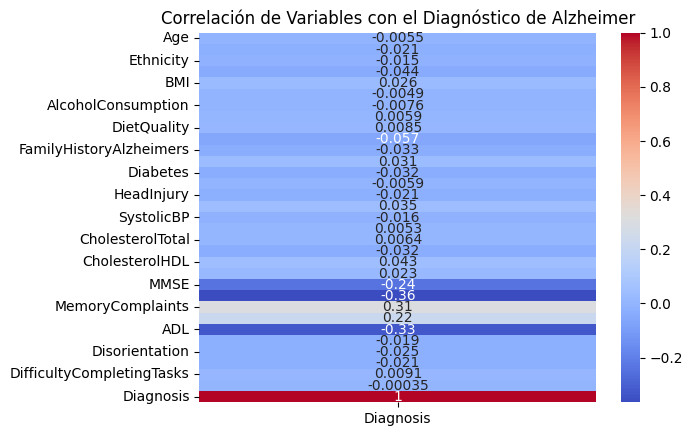

In [281]:
# Version completa (pero no se ve bien debido a que son muchas variables/columnas)
alzheimer_df_temp = alzheimer_df.drop(columns = ['PatientID', 'DoctorInCharge'])
corr_matrix = alzheimer_df_temp.corr()
sns.heatmap(corr_matrix[['Diagnosis']], annot=True, cmap='coolwarm')
plt.title("Correlación de Variables con el Diagnóstico de Alzheimer")
plt.show()

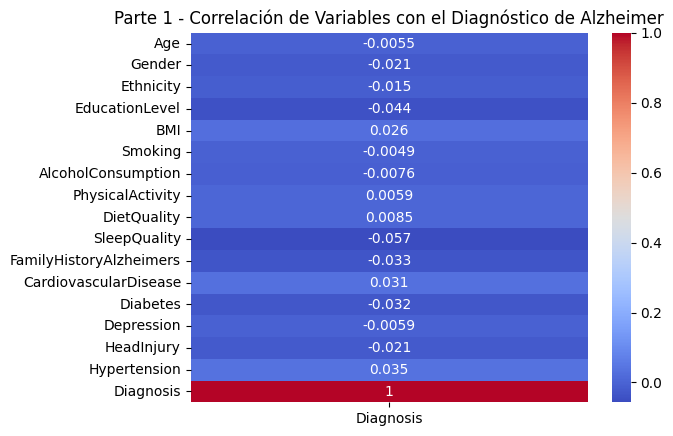

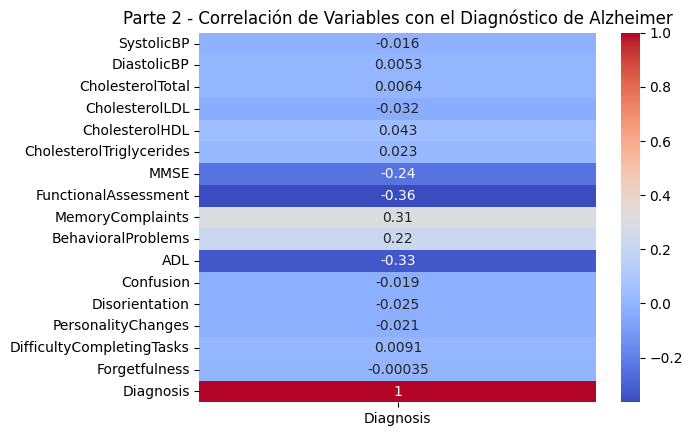

In [282]:
# Version en partes para que se vea mejor (aunque los colores no son los mismos en los mapas de calor)

# Parte 1
first_half_with_diagnosis = first_half.copy()
first_half_with_diagnosis.append("Diagnosis")

corr_matrix_first_half = alzheimer_df[first_half_with_diagnosis].corr()
sns.heatmap(corr_matrix_first_half[['Diagnosis']], annot=True, cmap='coolwarm')
plt.title("Parte 1 - Correlación de Variables con el Diagnóstico de Alzheimer")
plt.show()

# Parte 2
corr_matrix_second_half = alzheimer_df[second_half].corr()
sns.heatmap(corr_matrix_second_half[['Diagnosis']], annot=True, cmap='coolwarm')
plt.title("Parte 2 - Correlación de Variables con el Diagnóstico de Alzheimer")
plt.show()

In [283]:
# Analisis de las correlaciones mas importantes con el diagnostico de alzheimer

# Tomar las correlaciones con el diagnostico de alzheimer (excluyendo la columna Diagnosis)
diagnosis_correlations = corr_matrix['Diagnosis'].drop('Diagnosis')

# Ordenar las correlaciones de forma descendente
highest_correlations = diagnosis_correlations.abs().sort_values(ascending=False)

print("Las 10 variables con mayor correlacion (absoluta) con el diagnostico de alzheimer son:")
print(highest_correlations.head(10))

Las 10 variables con mayor correlacion (absoluta) con el diagnostico de alzheimer son:
FunctionalAssessment       0.364898
ADL                        0.332346
MemoryComplaints           0.306742
MMSE                       0.237126
BehavioralProblems         0.224350
SleepQuality               0.056548
EducationLevel             0.043966
CholesterolHDL             0.042584
Hypertension               0.035080
FamilyHistoryAlzheimers    0.032900
Name: Diagnosis, dtype: float64


Interpretacion: Confirmando lo que comentabamos en la Sección 2.4, se puede observar que las variables con mayor correlacion con el diagnostico de alzheimer son principalmente, y por orden de importancia, la evaluacion funcional (FunctionalAssessment), la evaluacion ADL (ADL), la quejas de memoria (MemoryComplaints), la evaluacion MMSE (MMSE) y los problemas de comportamiento (BehavioralProblems). En otras palabras, las variables que mas influyen en el diagnostico de alzheimer son aquellas que miden o estan relacionadas con la capacidad cognitiva del paciente y su capacidad de realizar actividades diarias. 

Es importante mencionar que las variables de evaluacion funcional, ADL y MMSE tienen una correlacion negativa con el diagnostico de alzheimer. Esto quiere decir que, entre mas bajo sea el puntaje en estas variables, mayor es la probabilidad de que el paciente sea diagnosticado con alzheimer. Esto se debe a que los puntajes bajos en dichas evaluaciones indican un deterioro cognitivo. Por otro lado, las variables de quejas de memoria y problemas de comportamiento tienen una correlacion positiva con el diagnostico de alzheimer, lo cual quiere decir que la presencia de estos problemas o quejas incrementa la probabilidad de que el paciente sea diagnosticado con alzheimer.

Finalmente, vale la pena recalcar que el historial familiar de alzheimer (FamilyHistoryAlzheimers) no es una de las variables más relevantes para el modelo. Esta observacion resulta un tanto inesperada, ya que estadisticamente hablando la enfermedad de alzheimer familiar representa un 1-5% de los casos registrados (fuente: https://pmc.ncbi.nlm.nih.gov/articles/PMC9966419/). Por ende, se esperaba que la correlacion del historial familiar de alzheimer con el diagnostico de alzheimer fuera mayor.

# 3. Procesamiento de datos

### 3.1 Reduccion de dimensionalidad

In [284]:
# Eliminar las columnas que no son relevantes para el modelo (PatientID, DoctorInCharge)
alzheimer_df.drop(columns=['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

### 3.2 Particion de datos

In [285]:
# Particion de datos en conjuntos de entrenamiento, validacion y prueba 
# 64% para entrenamiento, 16% para validacion y 20% para testing
train_df, test_df = train_test_split(alzheimer_df, test_size=0.2, random_state=123, stratify=alzheimer_df['Diagnosis'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=123, stratify=train_df['Diagnosis'])

print(f"Dimensiones de train_df (filas, columnas): {train_df.shape}")
print(f"Dimensiones de val_df (filas, columnas): {val_df.shape}")
print(f"Dimensiones de test_df (filas, columnas): {test_df.shape}")

# Separar las caracteristicas de las variables objetivo y definir la variable objetivo
X_train = train_df.drop(columns=["Diagnosis"])
y_train = train_df["Diagnosis"]

X_val = val_df.drop(columns=["Diagnosis"])
y_val = val_df["Diagnosis"]

X_test = test_df.drop(columns=["Diagnosis"])
y_test = test_df["Diagnosis"]

Dimensiones de train_df (filas, columnas): (1375, 33)
Dimensiones de val_df (filas, columnas): (344, 33)
Dimensiones de test_df (filas, columnas): (430, 33)


Nota: La proporcion 64-16-20 para el conjunto de entranamiento, validacion y testing respectivamente, sigue la regla general de ML en donde 80% de los datos son para entrenamiento y 20% son para testing. Con esta proporción se garantizan suficientes datos en cada conjunto, a pesar de que siempre se puede buscar una proporcion mas exacta para el dataset en particular.

### 3.3 Estandarización de datos

In [286]:
# Verificar que todas las columnas sean numericas
num_cols = alzheimer_df.select_dtypes(include=np.number).columns
print(num_cols)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


In [287]:
# Usar StandardScaler para escalar los datos y hacer uso de pipeline para aplicar el procesamiento
preprocessor = Pipeline(
    steps=[("scaler", StandardScaler())] # Nota: MinMaxScaler -> alternativa
)

# 4. Entrenamiento de modelos

### 4.1 K-Nearest Neighbors (KNN)

In [288]:
#TODO: Implementar KNN

### 4.2 Modelo de ensamble (Random Forest o Gradient Boosting)

In [289]:
# Definamos el random_state para que los resultados sean reproducibles
random_state = 123

# Definamos el modelo base Random Forest
rf_base = RandomForestClassifier(random_state=random_state)

# Definamos la malla de parámetros sobre la que haremos la búsqueda
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': list(range(3, 11)),
    'classifier__min_samples_leaf': [1, 5, 10, 20]
}

# Crear pipeline con preprocessor y Random Forest classifier
pipeline_rf = Pipeline(steps=[
    ('processor', preprocessor),
    ('classifier', rf_base)
])

# Definir el modelo mediante GridSearchCV con validación cruzada
rf = GridSearchCV(pipeline_rf, cv=5, param_grid=param_grid, scoring='f1', n_jobs=-1)

In [290]:
# Entrenar el Random Forest
print("Entrenando Random Forest...")
rf.fit(X_train, y_train)
print("Entrenamiento completado!")

Entrenando Random Forest...
Entrenamiento completado!


In [291]:
# Obtener los mejores hiperparámetros encontrados para el Random Forest
print("Mejores hiperparámetros encontrados:")
print(rf.best_params_)
print(f"\nMejor score de validación cruzada: {rf.best_score_:.4f}")

Mejores hiperparámetros encontrados:
{'classifier__max_depth': 9, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}

Mejor score de validación cruzada: 0.8788


In [292]:
# Obtener accuracy y F1 score de entrenamiento
print("Conjunto de entrenamiento:")
print(f'Accuracy: {rf.score(X_train, y_train):.4f}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro'):.4f}")

Conjunto de entrenamiento:
Accuracy: 0.9749
F1 score: 0.9808


In [293]:
# Obtener accuracy y F1 score de validación
print("Conjunto de validación:")
print(f'Accuracy: {rf.score(X_val, y_val):.4f}')
print(f"F1 score: {f1_score(y_val, rf.predict(X_val), average='macro'):.4f}")

Conjunto de validación:
Accuracy: 0.8772
F1 score: 0.9082


In [294]:
# Obtener accuracy y F1 score de prueba
print("Conjunto de prueba:")
print(f'Accuracy: {rf.score(X_test, y_test):.4f}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro'):.4f}")

Conjunto de prueba:
Accuracy: 0.9141
F1 score: 0.9351


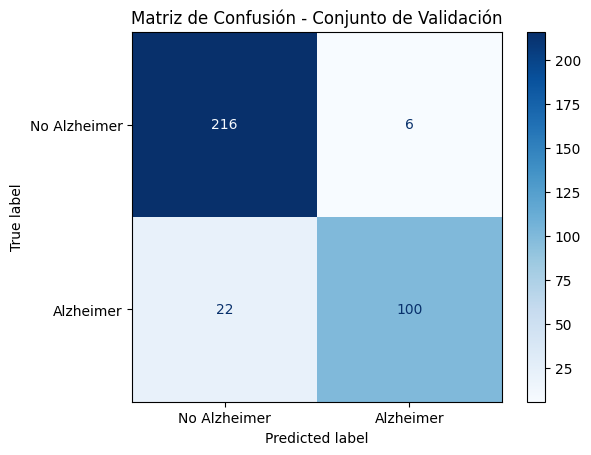

In [295]:
# Matriz de confusión para el conjunto de validación
cm_val = confusion_matrix(y_val, rf.predict(X_val))
disp_val = ConfusionMatrixDisplay(cm_val, display_labels=['No Alzheimer', 'Alzheimer'])
disp_val.plot(cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Validación')
plt.show()


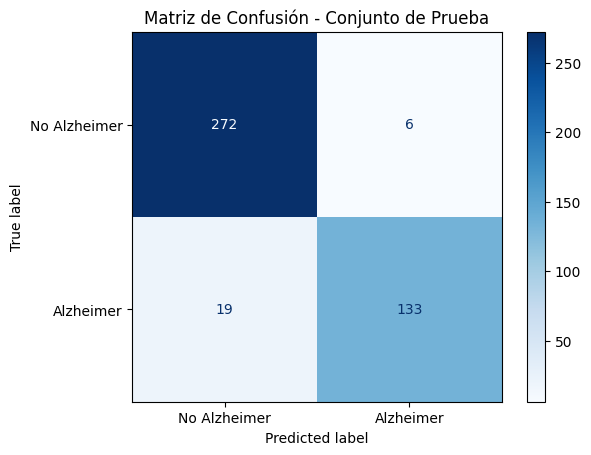

In [296]:
# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, rf.predict(X_test))
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=['No Alzheimer', 'Alzheimer'])
disp_test.plot(cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()


In [297]:
# Análisis de importancia de características
feature_importance = rf.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = X_train.columns

# Crear DataFrame con importancia de características
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 10 características más importantes:")
print(importance_df.head(10))

Top 10 características más importantes:
                     feature  importance
23      FunctionalAssessment    0.176865
26                       ADL    0.175431
22                      MMSE    0.132297
24          MemoryComplaints    0.096930
25        BehavioralProblems    0.056549
9               SleepQuality    0.029933
7           PhysicalActivity    0.029260
21  CholesterolTriglycerides    0.028227
18          CholesterolTotal    0.027457
8                DietQuality    0.027089


=== ANÁLISIS DE RESULTADOS DEL RANDOM FOREST ===

1. HIPERPARÁMETROS ÓPTIMOS:
   - n_estimators: 50
   - max_depth: 9
   - min_samples_leaf: 1
   - Score de validación cruzada (F1): 0.8788

2. RENDIMIENTO DEL MODELO:
   - Accuracy en entrenamiento: 0.9749
   - Accuracy en validación:   0.8772
   - Accuracy en prueba:       0.9141
   - F1-score en prueba: 0.9351

3. CARACTERÍSTICAS MÁS IMPORTANTES:
   Las 5 características más importantes son:
   1. FunctionalAssessment: 0.1769
   2. ADL: 0.1754
   3. MMSE: 0.1323
   4. MemoryComplaints: 0.0969
   5. BehavioralProblems: 0.0565

4. TABLA COMPARATIVA DE MÉTRICAS:


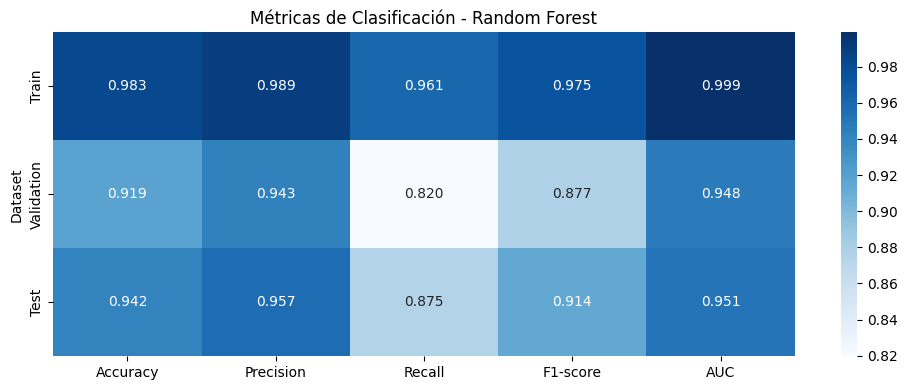


5. OBSERVACIONES:
   - El modelo muestra un buen rendimiento general (>85% accuracy).
   - Se observa cierto overfitting (diferencia de 6.09% entre train y test).
   - Las características más importantes coinciden con el análisis EDA
     (FunctionalAssessment, ADL, MemoryComplaints, MMSE, etc.)


In [298]:
# ============================================================
# ANÁLISIS DE RESULTADOS DEL RANDOM FOREST
# ============================================================

print("=== ANÁLISIS DE RESULTADOS DEL RANDOM FOREST ===\n")

# 1. Hiperparámetros óptimos
print("1. HIPERPARÁMETROS ÓPTIMOS:")
print(f"   - n_estimators: {rf.best_params_['classifier__n_estimators']}")
print(f"   - max_depth: {rf.best_params_['classifier__max_depth']}")
print(f"   - min_samples_leaf: {rf.best_params_['classifier__min_samples_leaf']}")
print(f"   - Score de validación cruzada (F1): {rf.best_score_:.4f}\n")

# 2. Rendimiento del modelo (Accuracy + F1)
print("2. RENDIMIENTO DEL MODELO:")
print(f"   - Accuracy en entrenamiento: {rf.score(X_train, y_train):.4f}")
print(f"   - Accuracy en validación:   {rf.score(X_val, y_val):.4f}")
print(f"   - Accuracy en prueba:       {rf.score(X_test, y_test):.4f}")
print(f"   - F1-score en prueba: "
      f"{f1_score(y_test, rf.predict(X_test), average='macro'):.4f}\n")

# 3. Importancia de características
print("3. CARACTERÍSTICAS MÁS IMPORTANTES:")
print("   Las 5 características más importantes son:")
for i, (_, row) in enumerate(importance_df.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f}")

# ------------------------------------------------------------
# Función para evaluación detallada
# ------------------------------------------------------------
def evaluate_classification(model, X, y, name="Dataset"):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]  # para AUC
    
    return {
        "Dataset": name,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, zero_division=0),
        "Recall": recall_score(y, y_pred, zero_division=0),
        "F1-score": f1_score(y, y_pred, zero_division=0),
        "AUC": roc_auc_score(y, y_pred_proba)
    }

# 4. Evaluación en train, val y test
results = []
results.append(evaluate_classification(rf, X_train, y_train, "Train"))
results.append(evaluate_classification(rf, X_val, y_val, "Validation"))
results.append(evaluate_classification(rf, X_test, y_test, "Test"))

results_df = pd.DataFrame(results)

print("\n4. TABLA COMPARATIVA DE MÉTRICAS:")

# Visualización de métricas
plt.figure(figsize=(10, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="Blues", fmt=".3f")
plt.title("Métricas de Clasificación - Random Forest")
plt.tight_layout()
plt.show()

# 5. Observaciones automáticas
print("\n5. OBSERVACIONES:")
if rf.score(X_test, y_test) > 0.85:
    print("   - El modelo muestra un buen rendimiento general (>85% accuracy).")
else:
    print("   - El modelo podría beneficiarse de más ajustes o más datos.")

gap = rf.score(X_train, y_train) - rf.score(X_test, y_test)
if gap > 0.05:
    print(f"   - Se observa cierto overfitting (diferencia de {gap:.2%} entre train y test).")
else:
    print("   - El modelo generaliza bien (bajo overfitting).")

print("   - Las características más importantes coinciden con el análisis EDA")
print("     (FunctionalAssessment, ADL, MemoryComplaints, MMSE, etc.)")


### 4.3 Deep Neural Network (DNN)

In [299]:
#TODO: Implementar DNN

### 4.4 Conclusiones

In [300]:
#TODO: Concluir 

# 5. Prueba con muestra artificial

### 5.1 Muestra artificial

In [301]:
# Crear muestra artificial para probar el modelo seleccionado
sample_data = {
    'Age': 74,
    'Gender': 1,                  # 0=Masculino, 1=Femenino
    'Ethnicity': 0,               # 0=Caucásico, 1=Afroamericano, 2=Asiático, 3=Otro
    'EducationLevel': 2,          # 0=Ninguno, 1=High School, 2=Bachelor's, 3=Más alto
    'BMI': 26.8,
    'Smoking': 0,                 # 0=No, 1=Sí
    'AlcoholConsumption': 12.5,   # Unidades semanales
    'PhysicalActivity': 4.2,      # Horas semanales
    'DietQuality': 6.8,           # Escala 0-10
    'SleepQuality': 7.1,          # Escala 4-10
    'FamilyHistoryAlzheimers': 1, # 0=No, 1=Sí
    'CardiovascularDisease': 0,   # 0=No, 1=Sí
    'Diabetes': 1,                # 0=No, 1=Sí
    'Depression': 0,              # 0=No, 1=Sí
    'HeadInjury': 0,              # 0=No, 1=Sí
    'Hypertension': 1,            # 0=No, 1=Sí
    'SystolicBP': 148,            # mmHg
    'DiastolicBP': 86,            # mmHg
    'CholesterolTotal': 235.4,    # mg/dL
    'CholesterolLDL': 142.6,      # mg/dL
    'CholesterolHDL': 48.3,       # mg/dL
    'CholesterolTriglycerides': 287.2,  # mg/dL
    'MMSE': 22.1,                 # Escala 0-30, menor = deterioro
    'FunctionalAssessment': 5.6,  # Escala 0-10, menor = deterioro
    'ADL': 6.4,                   # Escala 0-10, menor = deterioro
    'MemoryComplaints': 1,        # 0=No, 1=Sí
    'BehavioralProblems': 0,      # 0=No, 1=Sí
    'Confusion': 0,               # 0=No, 1=Sí
    'Disorientation': 0,          # 0=No, 1=Sí
    'PersonalityChanges': 1,      # 0=No, 1=Sí
    'DifficultyCompletingTasks': 0,  # 0=No, 1=Sí
    'Forgetfulness': 1            # 0=No, 1=Sí
}

# Crear DataFrame
sample_df = pd.DataFrame([sample_data])

# Mostrar informacion del DataFrame
print("Muestra artificial para predecir alzheimer:")
sample_df.head()

Muestra artificial para predecir alzheimer:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,ADL,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,74,1,0,2,26.8,0,12.5,4.2,6.8,7.1,...,22.1,5.6,6.4,1,0,0,0,1,0,1


### 5.2 Prediccion de Alzheimer

In [302]:
#TODO: Implementar prediccion de alzheimer